# Problem Statement:

 A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
 A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people needs once the situation gets better all around and stand out from other service providers and make huge profits.





### The company wants to know:


1.Which variables are significant in predicting the demand for shared bikes.

2.How well those variables describe the bike demands

### Business Goal:


You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [308]:
#read the bike sharing dataset and check the first five rows

bikesharing_df = pd.read_csv(r'C:\Users\nadee\OneDrive\Documents\D-Drive\upgrad-AI+ML\Linear Regression Case Study - bike Sharing\day.csv')
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [309]:
# check the shape of bike sharing data set

bikesharing_df.shape

(730, 16)

In [310]:
# describe the bike sharing data set

bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [311]:
#check the columns of data set

bikesharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [312]:
#check the size of data set

bikesharing_df.size

11680

In [313]:
#check the datatypes of data set

bikesharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [314]:
#Checking the number of null values in the columns

bikesharing_df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no null value in any of the column

## Step 2: Data Cleanup and Dropping irrelevant Column


1. Dataset is having day,month and Year and date column where date column is repeated and will not be useful in analysis.Hence we can drop dteday column

2. Casual and registered column is irrelevant for analysis so we can drop this column.

In [315]:
# Dropping  column

bikesharing_df_new=bikesharing_df.drop(['instant','dteday','casual','registered'],axis=1)

In [316]:
# describe the bike sharing data set after column drop


bikesharing_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [317]:
# Check the seasonwise count

bikesharing_df_new.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [318]:
# Check the weathersit wise count

bikesharing_df_new.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [319]:
#Find out number of unique values in all columns

bikesharing_df_new.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [320]:
# Convert Season and Weather sit values into categorical as per given data dictionary

bikesharing_df_new.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing_df_new.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikesharing_df_new.mnth = bikesharing_df_new.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikesharing_df_new.weekday = bikesharing_df_new.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bikesharing_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [321]:
# describe the bike sharing data set after data conversion


bikesharing_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data


We'll visualise our data using `matplotlib` and `seaborn`.

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1500x3000 with 0 Axes>

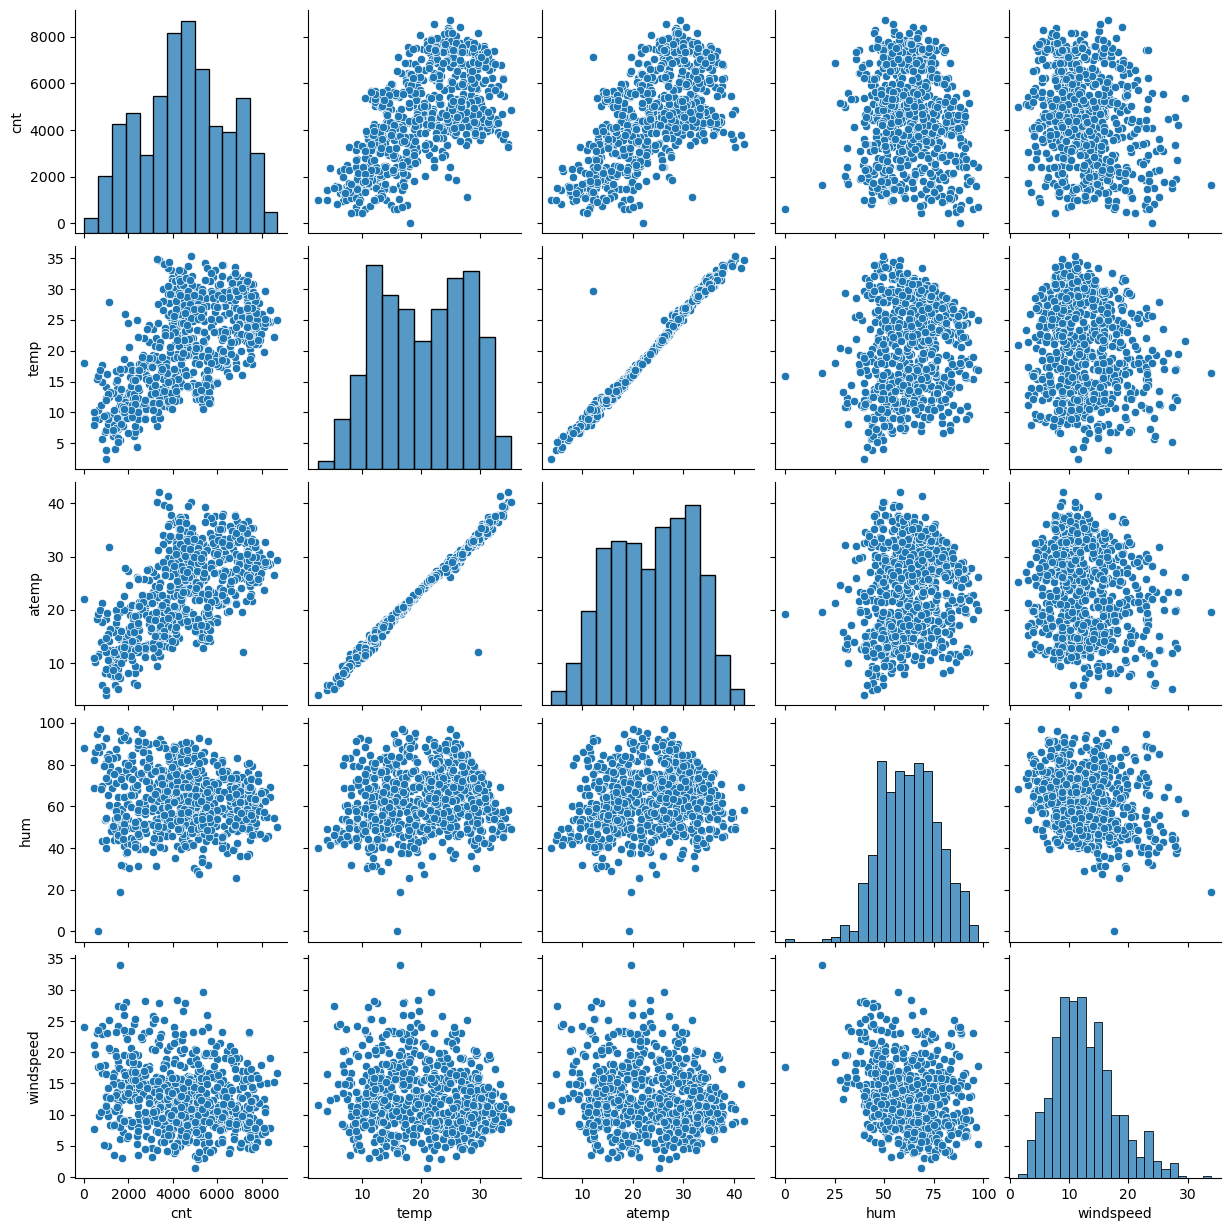

In [323]:
# Draw pairplots for continuous numeric variables using seaborn

plt.figure(figsize = (15,30))
sns.pairplot(data=bikesharing_df_new,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Visualising Categorical Variables

 Let's make a boxplot for some of categorical variables.

In [324]:
# To find out categorical variable in dataset

bikesharing_df_new.select_dtypes(exclude=['float64','datetime64','int64'])
print(bikesharing_df_new.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


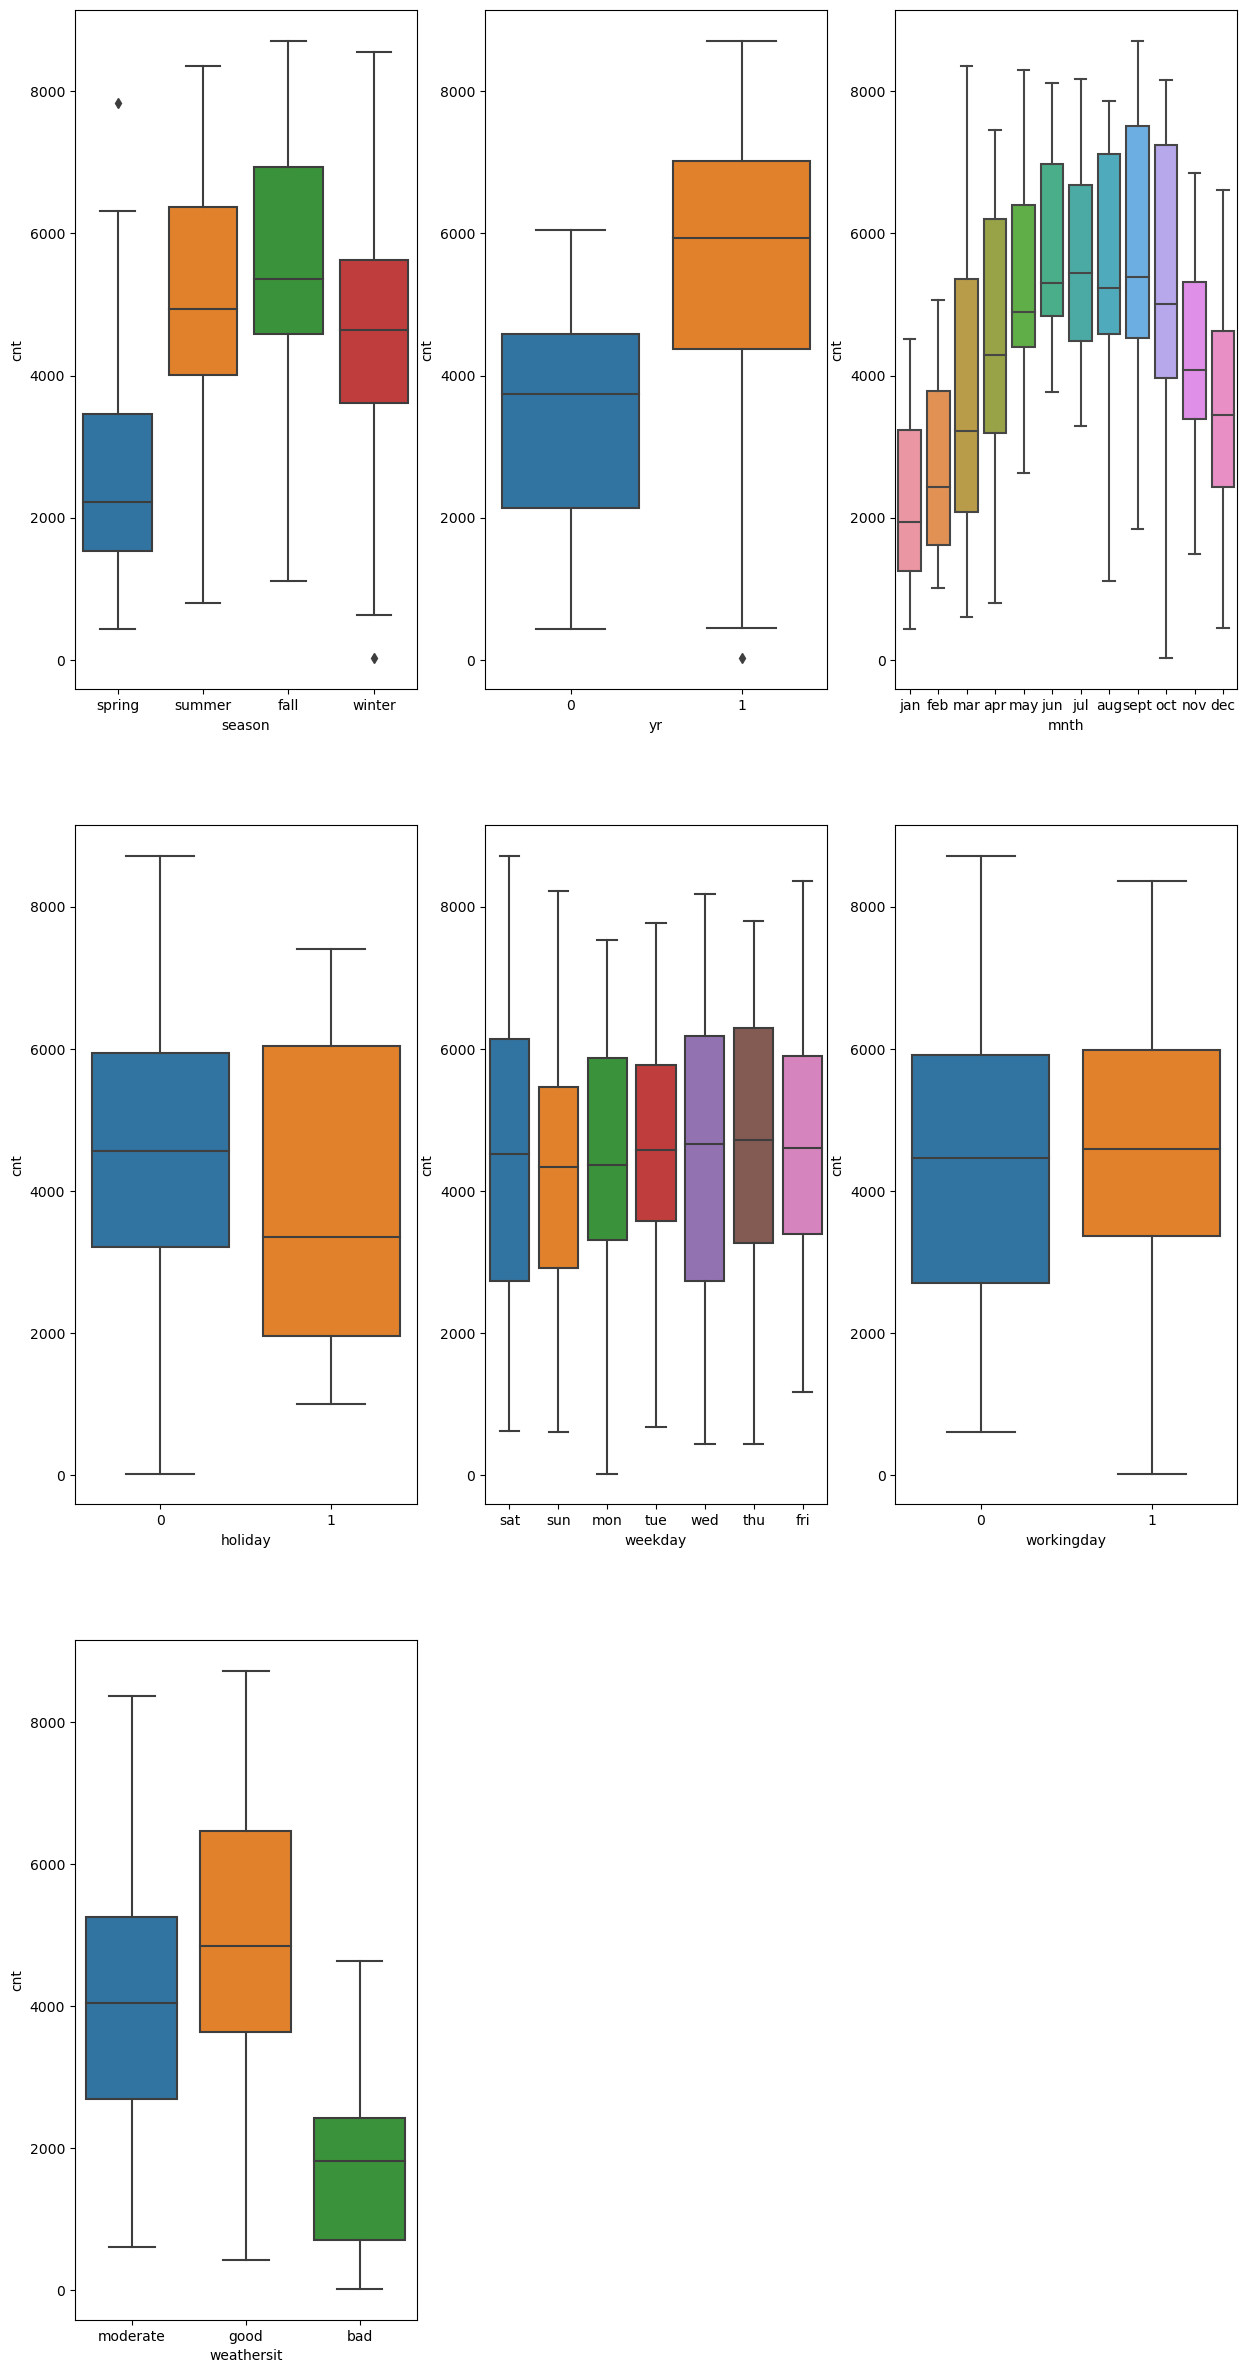

In [325]:
# Draw boxplot for Categorical variables

plt.figure(figsize = (15,30))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=bikesharing_df_new)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data=bikesharing_df_new)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data=bikesharing_df_new)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt', data=bikesharing_df_new)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt', data=bikesharing_df_new)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data=bikesharing_df_new)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt', data=bikesharing_df_new)
plt.show()

## Step 4: Data Preparation

In [326]:
# Check the bike sharing dataframe now

bikesharing_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [327]:
bikesharing_df_new = pd.get_dummies(data=bikesharing_df_new,columns=["season","mnth","weekday"],drop_first=True)
bikesharing_df_new = pd.get_dummies(data=bikesharing_df_new,columns=["weathersit"],drop_first=True)

In [328]:
#columns after creating dummy variables

bikesharing_df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [329]:
bikesharing_df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,True,False


In [330]:
bikesharing_df_new_up = bikesharing_df_new.copy()
bikesharing_df_new_up = bikesharing_df_new_up.astype(int) 
print(bikesharing_df_new_up) 

     yr  holiday  workingday  temp  atemp  hum  windspeed   cnt  \
0     0        0           0    14     18   80         10   985   
1     0        0           0    14     17   69         16   801   
2     0        0           1     8      9   43         16  1349   
3     0        0           1     8     10   59         10  1562   
4     0        0           1     9     11   43         12  1600   
..   ..      ...         ...   ...    ...  ...        ...   ...   
725   1        0           1    10     11   65         23  2114   
726   1        0           1    10     12   59         10  3095   
727   1        0           0    10     12   75          8  1341   
728   1        0           0    10     11   48         23  1796   
729   1        0           1     8     11   57         10  2729   

     season_spring  season_summer  ...  mnth_oct  mnth_sept  weekday_mon  \
0                1              0  ...         0          0            0   
1                1              0  ...     

## Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [331]:
#y to contain only target variable
y=bikesharing_df_new_up.pop('cnt')

#X is all remainign variable also our independent variables
X=bikesharing_df_new_up

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [332]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14,18,80,10,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14,17,69,16,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8,9,43,16,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8,10,59,10,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9,11,43,12,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [333]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int32

In [334]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)


(511, 29)
(219, 29)


In [335]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [336]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.546937,0.525817,0.649585,0.410959,0.230920,0.258317,0.250489,...,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.226353,0.208184,0.143639,0.183832,0.421834,0.438138,0.433719,...,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.536082,0.296296,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575758,0.564103,0.659794,0.370370,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.518519,0.000000,1.000000,0.500000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [337]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
683,1,0,1,0.333333,0.333333,0.639175,0.333333,0,0,1,...,0,0,0,0,0,1,0,0,0,1
645,1,1,0,0.393939,0.410256,0.721649,0.407407,0,0,1,...,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.727273,0.692308,0.505155,0.703704,0,1,0,...,0,0,1,0,0,0,0,0,1,0
360,0,0,1,0.333333,0.333333,0.783505,0.407407,1,0,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.727273,0.666667,0.814433,0.111111,0,0,1,...,1,0,0,0,0,0,0,1,0,1


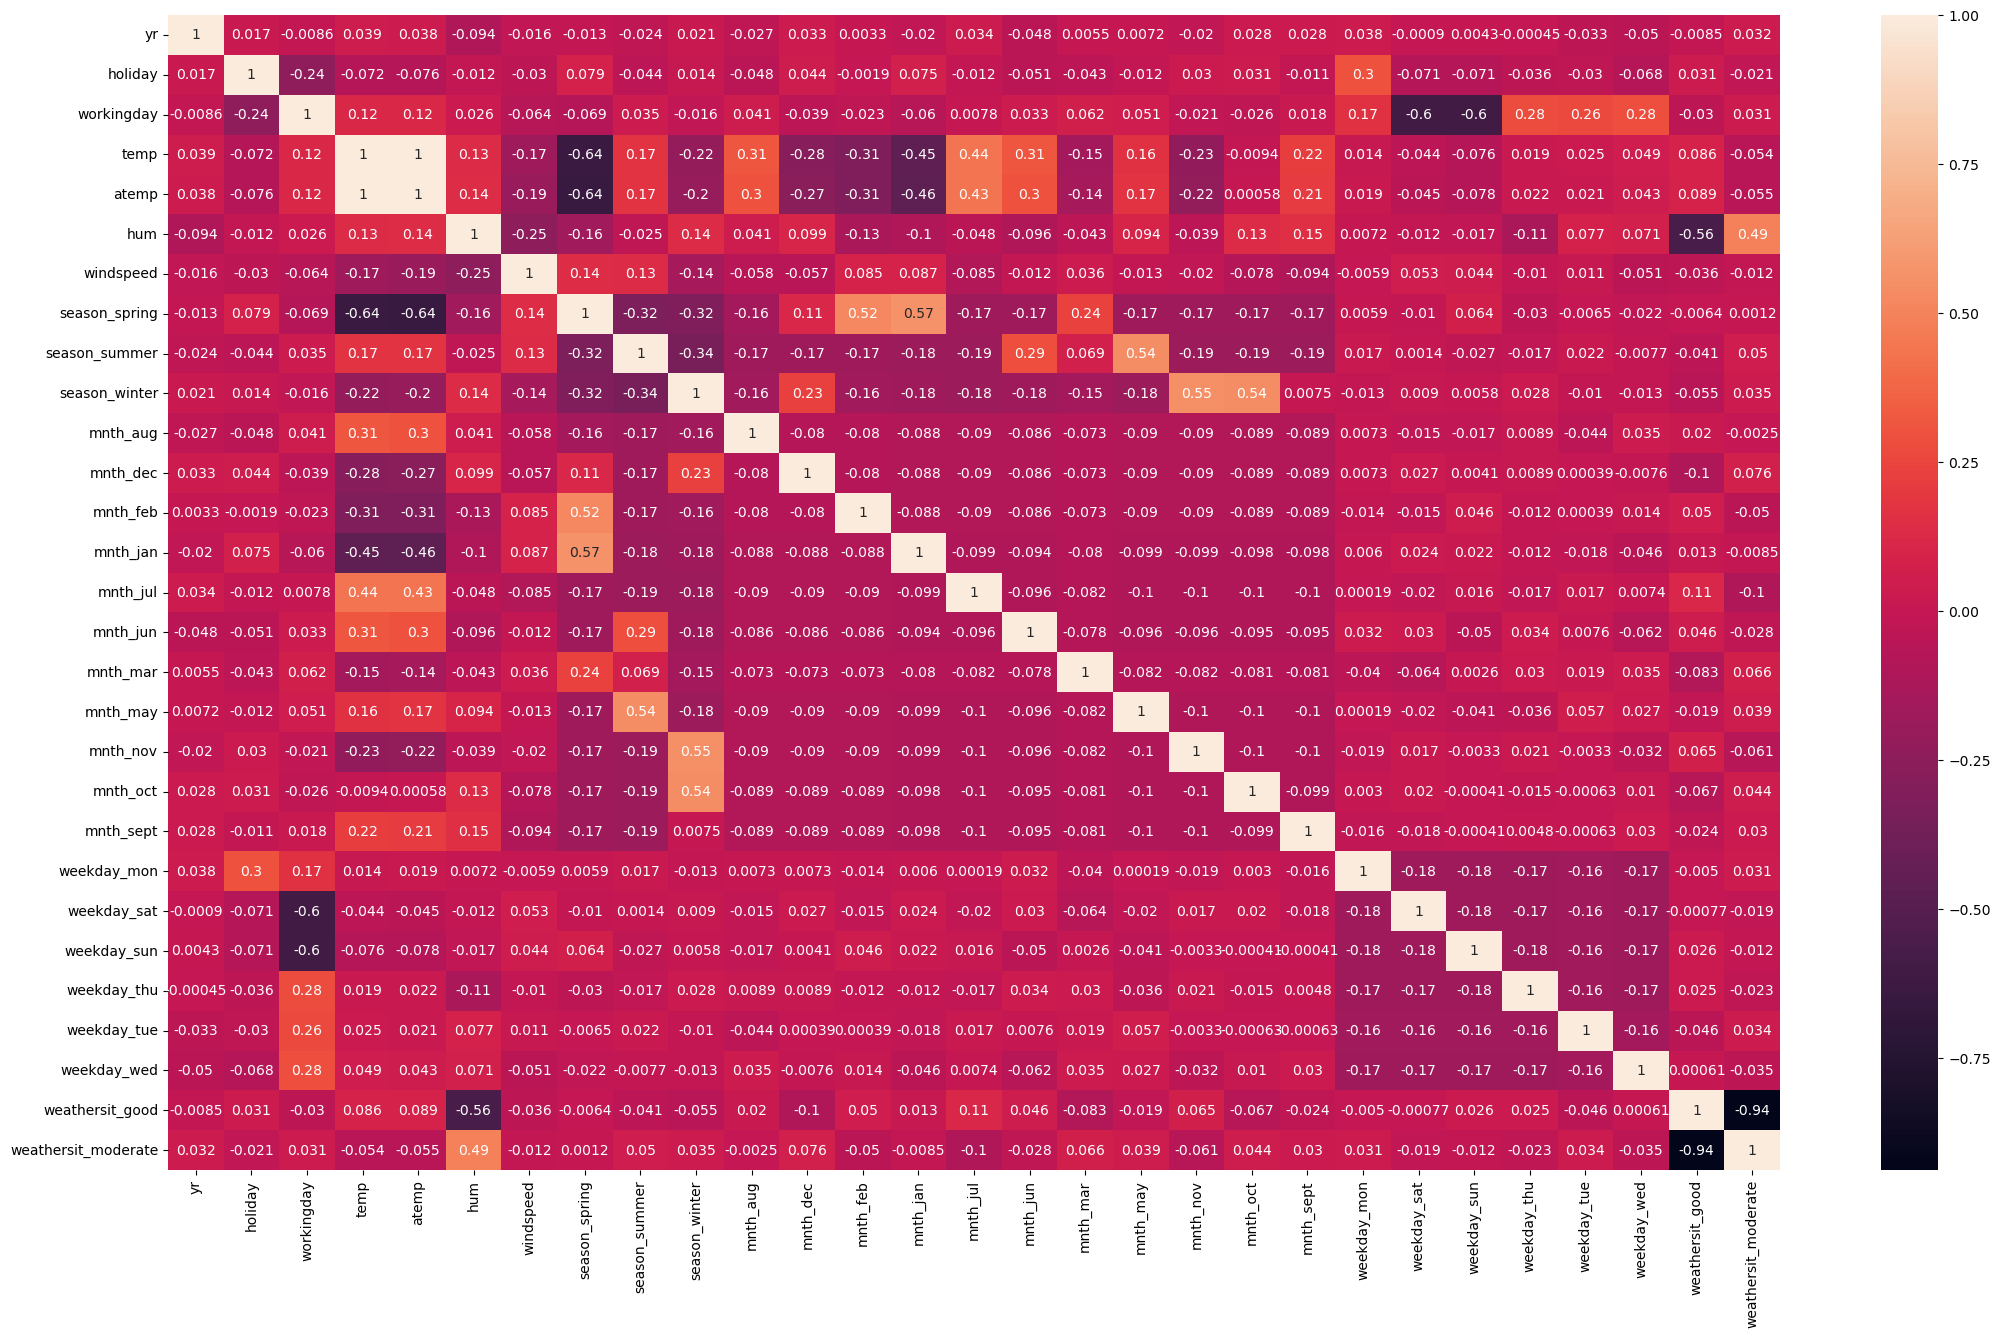

In [338]:
plt.figure(figsize = (26, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

## Step 5: Building a linear model

In [339]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [340]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [341]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 11),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 3),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 5),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 14),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [342]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [343]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [344]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [345]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'temp', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [347]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_moderate']]

In [348]:
X_train_rfe.shape

(511, 14)

### MODEL BUILDING

In [349]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [350]:
est = sm.OLS(y.astype(float), X.astype(float)).fit()

In [351]:
#Selected columns for Model 1 - all columns selected by RFE

cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
        'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     155.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          4.33e-171
Time:                        02:24:24   Log-Likelihood:                -4162.4
No. Observations:                 511   AIC:                             8355.
Df Residuals:                     496   BIC:                             8418.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2966.5122    

In [354]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
     'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     167.7
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.28e-172
Time:                        02:26:19   Log-Likelihood:                -4162.4
No. Observations:                 511   AIC:                             8353.
Df Residuals:                     497   BIC:                             8412.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2967.3078    

In [355]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.60e-161
Time:                        02:27:05   Log-Likelihood:                -4191.0
No. Observations:                 511   AIC:                             8408.
Df Residuals:                     498   BIC:                             8463.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1476.2168    

In [357]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.2
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          5.83e-162
Time:                        02:27:33   Log-Likelihood:                -4192.1
No. Observations:                 511   AIC:                             8408.
Df Residuals:                     499   BIC:                             8459.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1414.2986    

In [358]:
# Dropping the variable mnth_jul,temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     188.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.63e-162
Time:                        02:27:55   Log-Likelihood:                -4194.0
No. Observations:                 511   AIC:                             8410.
Df Residuals:                     500   BIC:                             8457.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1338.2297    

In [359]:
## Trying to replace July with spring as both were highly correlated
#removing of working_day,Summer and adding temp

cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
        'weathersit_moderate','temp']
build_model(cols6)
get_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     220.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          7.54e-159
Time:                        02:30:50   Log-Likelihood:                -4207.7
No. Observations:                 511   AIC:                             8433.
Df Residuals:                     502   BIC:                             8472.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1573.1141    

##### Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.78.Hence we finalize this model to use further


In [360]:
#Build a model with all columns to select features automatically


def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [361]:
#Let us build the finalmodel using sklearn
#Build a model with above columns



lr = build_model_sk(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

1573.114081800336 [ 2047.32210232 -1107.52525879  -529.50854044   472.65187243
   455.77917489  -280.5808779   -557.96737663  4196.52144187]


### Step 6 : Model Evaluation

In [362]:
y_train_pred = lr.predict(X_train[cols6])

In [363]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

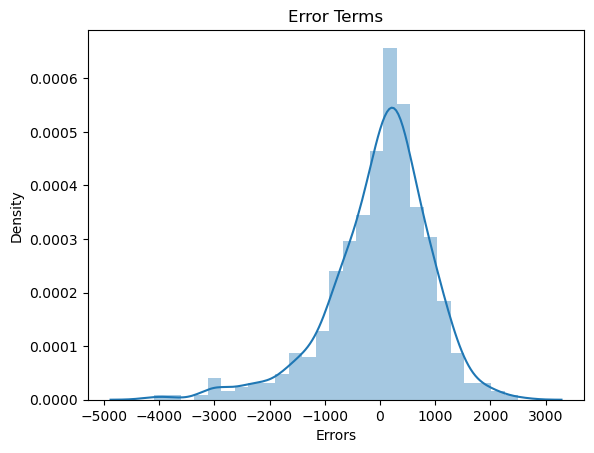

In [364]:
plot_res_dist(y_train, y_train_pred)

### Actual vs predicted

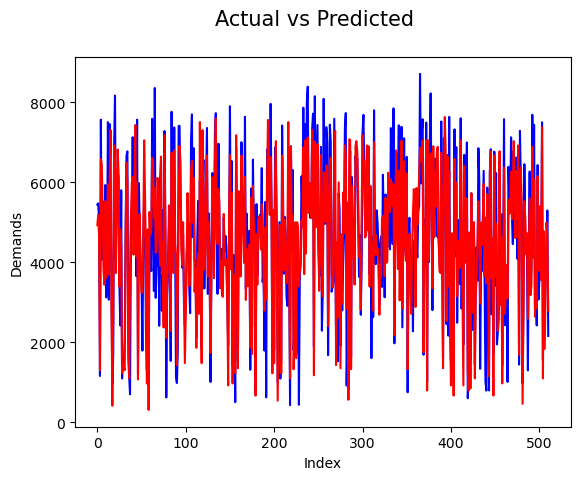

In [365]:

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## R-Squared value for train predictions

In [366]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7783327065569614

In [367]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [369]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
        'weathersit_moderate','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols6])

## R-Squared value for test predictions

In [370]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7542130871074735

In [371]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.7542130871074735

Text(0, 0.5, 'y_pred')

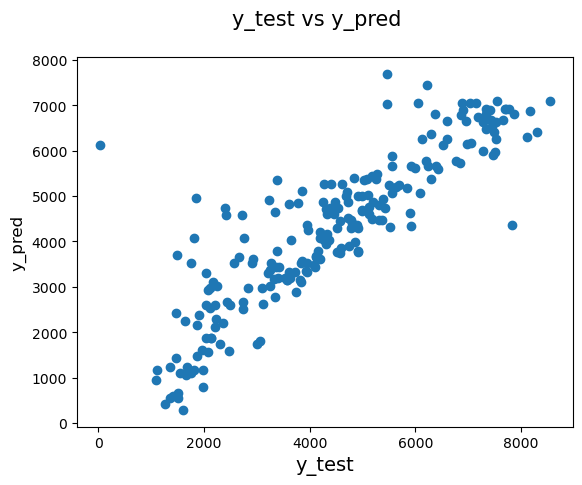

In [372]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [374]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it

cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
        'weathersit_moderate','temp']

lm = build_model(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     220.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          7.54e-159
Time:                        02:39:01   Log-Likelihood:                -4207.7
No. Observations:                 511   AIC:                             8433.
Df Residuals:                     502   BIC:                             8472.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1573.1141    

### Conclusion
Significant variables to predict the demand for shared bikes


- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Sunday
- weathersit( Light Snow, Mist + Cloud